In [1]:
from LSTM_GNN import DataLoader, LSTMoutput
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import pandas as pd

In [2]:
loader = DataLoader('save.csv', 40, 28*2, 21, 7)
x_train, y_train, x_test = loader.train_test_split()

model = Sequential()
model.add(LSTM(loader.n_pred*77, batch_input_shape=(loader.n_batch,loader.n_timesteps,77)))
model.add(Dense(loader.n_pred*77//2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(loader.n_pred*77, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=100, batch_size=14)

2023-04-06 10:29:55.999872: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
2/2 [==============================] - 1s 38ms/step - loss: 1.0704
Epoch 2/100
2/2 [==============================] - 0s 37ms/step - loss: 0.9243
Epoch 3/100
2/2 [==============================] - 0s 27ms/step - loss: 0.7282
Epoch 4/100
2/2 [==============================] - 0s 26ms/step - loss: 0.5714
Epoch 5/100
2/2 [==============================] - 0s 27ms/step - loss: 0.4464
Epoch 6/100
2/2 [==============================] - 0s 27ms/step - loss: 0.3662
Epoch 7/100
2/2 [==============================] - 0s 27ms/step - loss: 0.3185
Epoch 8/100
2/2 [==============================] - 0s 27ms/step - loss: 0.2664
Epoch 9/100
2/2 [==============================] - 0s 26ms/step - loss: 0.2595
Epoch 10/100
2/2 [==============================] - 0s 26ms/step - loss: 0.2433
Epoch 11/100
2/2 [==============================] - 0s 26ms/step - loss: 0.2248
Epoch 12/100
2/2 [==============================] - 0s 26ms/step - loss: 0.2164
Epoch 13/100
2/2 [==============================]

1/1 [==============================] - 0s 41ms/step


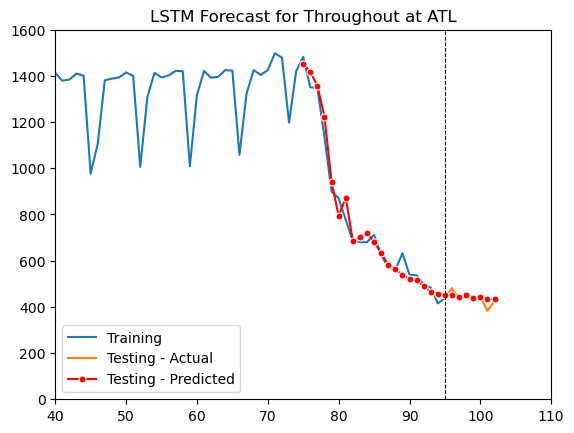

In [7]:
predicted = model.predict(x_test)
result = LSTMoutput(loader, 2)
result.inverse_transform(predicted)
result.plot()